In [67]:
#Import libraries
import os
import json
import pandas as pd 
import calendar
import numpy as np
from sklearn import metrics
from matplotlib.ticker import FuncFormatter
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt 

In [3]:
df1 = pd.read_csv('exercise_40_train.csv')

In [4]:
df1.shape

(40000, 101)

In [5]:
df1.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, y to x100
dtypes: float64(86), int64(3), object(12)
memory usage: 30.8+ MB


In [7]:
# Categorical variables:
df1_cat = df1.loc[:,df1.dtypes == np.object]

C:\Users\fahiy\AppData\Local\Temp/ipykernel_19252/2515162611.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df1_cat = df1.loc[:,df1.dtypes == np.object]


In [8]:
df1_num = df1.select_dtypes(exclude='object')
df1_num_list = list(df1.select_dtypes(exclude='object').columns)
print(f"There are {len(df1_num_list)} numerical features:\n", df1_num_list)

There are 89 numerical features:
 ['y', 'x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x20', 'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x32', 'x34', 'x35', 'x36', 'x37', 'x38', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x61', 'x62', 'x63', 'x64', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x100']


In [9]:
df1_cat = df1.loc[:,df1.dtypes == np.object]
df1_cat

C:\Users\fahiy\AppData\Local\Temp/ipykernel_19252/2211213971.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df1_cat = df1.loc[:,df1.dtypes == np.object]


,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,0.0062%,$-908.650758424405,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,0.0064%,$-1864.9622875143,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,-8e-04%,$-543.187402955527,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,-0.0057%,$-182.626380634258,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,0.0109%,$967.007090837503,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,Sun,-0.0085%,$3750.51991954505,female,no,NaN,5-10 miles,July,farmers,NaN,no,yes
39996,Thursday,0.0077%,$448.867118077561,male,yes,Illinois,5-10 miles,July,progressive,ford,no,yes
39997,Monday,-0.0216%,$834.95775080472,male,yes,NaN,5-10 miles,August,geico,ford,no,yes
39998,Tuesday,1e-04%,$-48.1031003332715,male,no,Ohio,5-10 miles,December,farmers,NaN,no,yes


In [10]:
df1_cat.describe(include=[np.object])

C:\Users\fahiy\AppData\Local\Temp/ipykernel_19252/3483160286.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df1_cat.describe(include=[np.object])


,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
count,40000,40000,40000,36144,40000,32829,40000,40000,40000,30743,40000,27164
unique,14,663,40000,2,2,51,1,12,5,7,2,1
top,Wednesday,0.0022%,$-908.650758424405,female,no,California,5-10 miles,December,progressive,ford,no,yes
freq,4930,193,1,18158,34022,3393,40000,8136,10877,9005,35506,27164


In [11]:
#Replacing $ and % and turn categorical data into numeric
df1_cat['x19'] = df1_cat['x19'].str.replace('$','').astype(float)
df1_cat['x7'] = df1_cat['x7'].str.replace('%','').astype(float)

C:\Users\fahiy\AppData\Local\Temp/ipykernel_19252/2838846718.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1_cat['x19'] = df1_cat['x19'].str.replace('$','').astype(float)
C:\Users\fahiy\AppData\Local\Temp/ipykernel_19252/2838846718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cat['x19'] = df1_cat['x19'].str.replace('$','').astype(float)
C:\Users\fahiy\AppData\Local\Temp/ipykernel_19252/2838846718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [12]:
# Checking categorical variables after replacing $ and %
df1_cat

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,0.0062,-908.650758,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,0.0064,-1864.962288,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,-0.0008,-543.187403,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,-0.0057,-182.626381,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,0.0109,967.007091,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,Sun,-0.0085,3750.519920,female,no,NaN,5-10 miles,July,farmers,NaN,no,yes
39996,Thursday,0.0077,448.867118,male,yes,Illinois,5-10 miles,July,progressive,ford,no,yes
39997,Monday,-0.0216,834.957751,male,yes,NaN,5-10 miles,August,geico,ford,no,yes
39998,Tuesday,0.0001,-48.103100,male,no,Ohio,5-10 miles,December,farmers,NaN,no,yes


#### We need to get rid of 'x7' and 'x19' from the list of categorical columns and transfer them over to numerical features. 

In [13]:
df1['x7'] = df1_cat['x7']
df1['x19'] = df1_cat['x19']
#df1_cat.drop(['x7','x19'],axis = 1, inplace = True)

C:\Users\fahiy\Documents\Springboard-Tools\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
# Checking categorical variables after removing x7 and x19 and turning them into numerical featuresd
df1_cat

,x3,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes
...,...,...,...,...,...,...,...,...,...,...
39995,Sun,female,no,NaN,5-10 miles,July,farmers,NaN,no,yes
39996,Thursday,male,yes,Illinois,5-10 miles,July,progressive,ford,no,yes
39997,Monday,male,yes,NaN,5-10 miles,August,geico,ford,no,yes
39998,Tuesday,male,no,Ohio,5-10 miles,December,farmers,NaN,no,yes


#### Doing get_dummies encoding on Categorical Variables

In [15]:
df1 = pd.get_dummies(df1, columns=['x3', 'x24', 'x31', 'x33', 'x39', 'x60', 'x65', 'x77', 'x93', 'x99'])

In [16]:
df1.head()

,y,x1,x2,x4,x5,x6,x7,x8,x9,x10,...,x77_buick,x77_chevrolet,x77_ford,x77_mercedes,x77_nissan,x77_subaru,x77_toyota,x93_no,x93_yes,x99_yes
0,0,0.165254,18.060003,1.077380,-1.339233,-1.584341,0.0062,0.220784,1.816481,1.171788,...,0,0,0,1,0,0,0,1,0,1
1,1,2.441471,18.416307,1.482586,0.920817,-0.759931,0.0064,1.192441,3.513950,1.419900,...,0,0,0,1,0,0,0,1,0,1
2,1,4.427278,19.188092,0.145652,0.366093,0.709962,-0.0008,0.952323,0.782974,-1.247022,...,0,0,0,0,0,1,0,1,0,1
3,0,3.925235,19.901257,1.763602,-0.251926,-0.827461,-0.0057,-0.520756,1.825586,2.223038,...,0,0,0,0,1,0,0,1,0,1
4,0,2.868802,22.202473,3.405119,0.083162,1.381504,0.0109,-0.732739,2.151990,-0.275406,...,0,0,0,0,0,0,1,0,1,1


In [17]:
#Exploring missing values
df1.isnull().sum()[df1.isnull().sum() !=0]

x5      2428
x11     5110
x14     9864
x16    11212
x22     2387
x26     2433
x30    32336
x38     2402
x41     9503
x42     9729
x44    34247
x45     8009
x49    12823
x52    16182
x54    12728
x55    17696
x57    32464
x61     7293
x63     2420
x64     5101
x67     2425
x68     2384
x74    12916
x75     5245
x76     5249
x78    11373
x79     2430
x80     5256
x83     2428
x85     9715
x86     2407
x88     2331
x89    10691
x91     5259
x92     2435
x94     2340
x95    12604
x96     6638
dtype: int64

#### Counting percentages of missing values

In [18]:
missing_data_count = df1.isnull().sum()
missing_data_percent = df1.isnull().sum() / len(df1) * 100

missing_data = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data.head(20)

There are 38 features having missing data.

Top 10 missing value features:


,Count,Percent
x44,34247,85.6175
x57,32464,81.1600
x30,32336,80.8400
x55,17696,44.2400
x52,16182,40.4550
x74,12916,32.2900
x49,12823,32.0575
x54,12728,31.8200
x95,12604,31.5100
x78,11373,28.4325


In [19]:
list_null_columns= missing_data.head(42).index.tolist()
list_null_columns

['x44',
 'x57',
 'x30',
 'x55',
 'x52',
 'x74',
 'x49',
 'x54',
 'x95',
 'x78',
 'x16',
 'x89',
 'x14',
 'x42',
 'x85',
 'x41',
 'x45',
 'x61',
 'x96',
 'x91',
 'x80',
 'x76',
 'x75',
 'x11',
 'x64',
 'x92',
 'x26',
 'x79',
 'x83',
 'x5',
 'x67',
 'x63',
 'x86',
 'x38',
 'x22',
 'x68',
 'x94',
 'x88']

#### We can see there are thousands of missing values for 38 different features and the lowest is close to 2000 and the highest is close to 35,000 our of 40,000 total observation. If we drop the null rows, we will miss significant amount of information and the model won't perform good at all. I decided to Doing isnull() on columns that have NaNs in them. Since there are 38 features with null values, we will have 38 extra features added to the dataset. However it would still be a good dataset with a good column to row ratio. 

In [20]:
list_null_columns = ['x44', 'x57', 'x30', 'x55', 'x52', 'x74', 'x49', 'x54', 'x95', 'x78', 'x16', 'x89', 'x14', 'x42', 
                     'x85', 'x41', 'x45', 'x61', 'x96', 'x91', 'x80', 'x76', 'x75', 'x11', 'x64', 'x92', 'x26', 'x79', 
                     'x83', 'x5', 'x67', 'x63', 'x86', 'x38', 'x22', 'x68', 'x94', 'x88']
list_with_isnull = []
for i in list_null_columns:
    s = i + '_isnull'
    list_with_isnull.append(s)
#list_with_isnull

In [21]:
list_with_isnull

['x44_isnull',
 'x57_isnull',
 'x30_isnull',
 'x55_isnull',
 'x52_isnull',
 'x74_isnull',
 'x49_isnull',
 'x54_isnull',
 'x95_isnull',
 'x78_isnull',
 'x16_isnull',
 'x89_isnull',
 'x14_isnull',
 'x42_isnull',
 'x85_isnull',
 'x41_isnull',
 'x45_isnull',
 'x61_isnull',
 'x96_isnull',
 'x91_isnull',
 'x80_isnull',
 'x76_isnull',
 'x75_isnull',
 'x11_isnull',
 'x64_isnull',
 'x92_isnull',
 'x26_isnull',
 'x79_isnull',
 'x83_isnull',
 'x5_isnull',
 'x67_isnull',
 'x63_isnull',
 'x86_isnull',
 'x38_isnull',
 'x22_isnull',
 'x68_isnull',
 'x94_isnull',
 'x88_isnull']

In [22]:
list_with_isnull = ['x44_isnull', 'x57_isnull', 'x30_isnull', 'x55_isnull', 'x52_isnull', 'x74_isnull', 'x99_isnull', 
                    'x49_isnull', 'x54_isnull', 'x95_isnull', 'x78_isnull', 'x16_isnull', 'x89_isnull', 'x14_isnull', 
                    'x42_isnull', 'x85_isnull', 'x41_isnull', 'x77_isnull', 'x45_isnull', 'x61_isnull', 'x33_isnull', 
                    'x96_isnull', 'x91_isnull', 'x80_isnull', 'x76_isnull', 'x75_isnull', 'x11_isnull', 'x64_isnull', 
                    'x24_isnull', 'x92_isnull', 'x26_isnull', 'x79_isnull', 'x83_isnull', 'x5x67_isnull', 'x63_isnull', 
                    'x86_isnull', 'x38_isnull', 'x22_isnull', 'x68_isnull', 'x94_isnull', 'x88_isnull']
for i,j in zip(list_with_isnull,list_null_columns): #Looping over lists simultaneously
    df1[i] = df1[j].isnull()

In [23]:
df1.head()

,y,x1,x2,x4,x5,x6,x7,x8,x9,x10,...,x24_isnull,x92_isnull,x26_isnull,x79_isnull,x83_isnull,x5x67_isnull,x63_isnull,x86_isnull,x38_isnull,x22_isnull
0,0,0.165254,18.060003,1.077380,-1.339233,-1.584341,0.0062,0.220784,1.816481,1.171788,...,False,False,False,False,False,True,False,False,False,False
1,1,2.441471,18.416307,1.482586,0.920817,-0.759931,0.0064,1.192441,3.513950,1.419900,...,False,False,False,False,False,False,False,False,False,False
2,1,4.427278,19.188092,0.145652,0.366093,0.709962,-0.0008,0.952323,0.782974,-1.247022,...,False,False,False,False,False,False,False,False,False,False
3,0,3.925235,19.901257,1.763602,-0.251926,-0.827461,-0.0057,-0.520756,1.825586,2.223038,...,False,False,False,False,False,False,False,False,False,False
4,0,2.868802,22.202473,3.405119,0.083162,1.381504,0.0109,-0.732739,2.151990,-0.275406,...,False,False,False,False,False,False,False,False,False,False


### Feature Engineering: Imputation

We see above that there are 38 columns with missing values. I will replace them with the mean of the corresponding column. 

In [24]:
list_null_columns
df1[list_null_columns] = df1[list_null_columns].fillna(value=df1[list_null_columns].mean())

In [25]:
train_data, val_data = train_test_split(df1, test_size=0.2)
train_data.shape, val_data.shape

((32000, 226), (8000, 226))

In [26]:
train_x = train_data.drop(['y'], axis=1)
train_y = train_data['y']
val_x = val_data.drop(['y'], axis=1)
val_y = val_data['y']

### Training First Model: Random Forest

In [27]:
#Fitting Model
rfmodel = RandomForestClassifier(n_estimators= 100, criterion= 'entropy')
rfmodel.fit(train_x, train_y)
#Predict Value for Validation data
rfpred = rfmodel.predict(val_x)

#### Calculating Metrics- RandomForest

In [28]:
# Calculating Precision, Recall and F1 Score
print(classification_report(val_y, rfpred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      6843
           1       0.50      0.00      0.00      1157

    accuracy                           0.86      8000
   macro avg       0.68      0.50      0.46      8000
weighted avg       0.80      0.86      0.79      8000



In [48]:
#Generate predicted probabilites
rfmodel_probs = rfmodel.predict_proba(val_x)
print('AUC: ', roc_auc_score(val_y, rfmodel_probs[:,1]))
print('Accuracy: ', rfmodel.score(val_x, val_y))

AUC:  0.7456368297931972
Accuracy:  0.855375


### Training Second Model: Logistic Regression

In [31]:
#Fittin Model
logmodel = LogisticRegression(max_iter=3000)
logmodel.fit(train_x, train_y)
#Predict Value for Validation data
logpred = logmodel.predict(val_x)

In [49]:
#Generate predicted probabilites
logmodel_probs = logmodel.predict_proba(val_x)
print('AUC: ', roc_auc_score(val_y, logmodel_probs[:,1]))
print('Accuracy: ', logmodel.score(val_x, val_y))

AUC:  0.6189750839643208
Accuracy:  0.855375


In [65]:
from sklearn import metrics
models=['Random Forest Classifier','Logistic Regression', "XGBoost"]
accuracy=[rfpred,logpred,xgpred]

for i,j in zip(models,accuracy):
  print("Accuracy for {} : {}".format(i,metrics.accuracy_score(val_y,j)))

Accuracy for Random Forest Classifier : 0.855375
Accuracy for Logistic Regression : 0.855375
Accuracy for XGBoost : 0.858125


Now getting the probabilities; 0 or 1 output, by using the predict_proba function and then slicing the list so that we only end up with the probability that the target variable will be 1.
I will be using r_prob to plot a diagonal line which covers 50% of the curve or has an AUC of 0.5. It is called random choice because it has a 50% chance of correctly predicting the target variable.

In [59]:
r_prob=[0 for i in range(len(val_y))]
rfpred_prob=rfmodel.predict_proba(val_x)[::,1]
logpred_prob=logmodel.predict_proba(val_x)[::,1]
xgpred_prob=xgmodel.predict_proba(val_x)[::,1]

Getting the FPR,TPR and threshold values for each model.

In [60]:
fpr1, tpr1, _a = metrics.roc_curve(val_y,  rfpred_prob)
fpr2,tpr2,_b= metrics.roc_curve(val_y,  logpred_prob)
fpr3,tpr3,_c= metrics.roc_curve(val_y,  xgpred_prob)

Plotting the curve

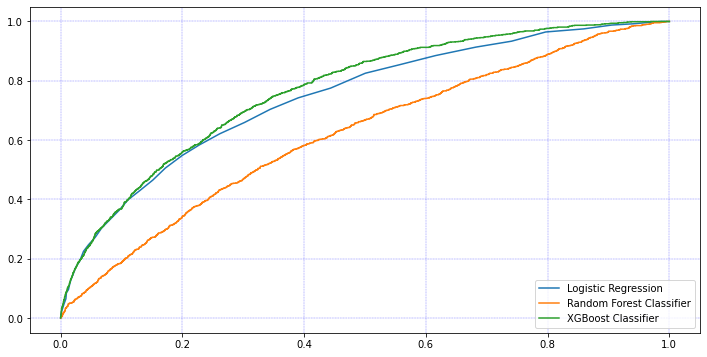

In [61]:
plt.figure(figsize=(12,6))
plt.plot(fpr1,tpr1,label="Logistic Regression")
plt.plot(fpr2,tpr2,label="Random Forest Classifier")
plt.plot(fpr3,tpr3,label="XGBoost Classifier")
plt.legend(loc=4)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()

Calculating the AUC Score and storing in a list

In [62]:
auc_score=[metrics.roc_auc_score(val_y,i) for i in [rfpred_prob,logpred_prob, xgpred_prob] ]

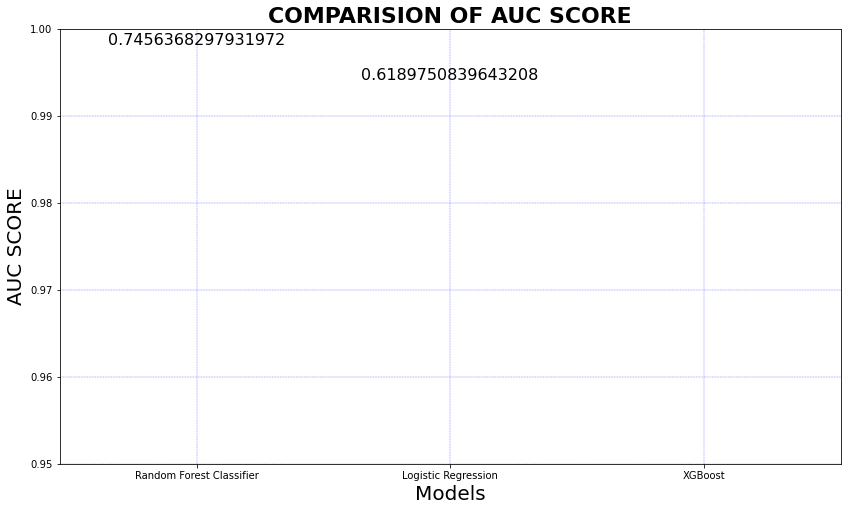

In [66]:
plt.figure(figsize=(14,8))
plt.bar(models,auc_score,color='midnightblue',width=0.8)
plt.xlabel('Models',fontsize=20)
plt.ylabel('AUC SCORE',fontsize=20)
plt.title('COMPARISION OF AUC SCORE',fontsize=22,weight='bold')
plt.ylim(top=1)
plt.ylim(bottom=0.95)
plt.grid(color='b',ls='-.',lw=0.25)

#for displaying the value above plot
plt.text(-.35,0.9982,str(auc_score[0]),fontsize=16)
plt.text(0.65,0.9942,str(auc_score[1]),fontsize=16)
plt.show()

### Training 3rd Model: XGBoost

In [57]:
xgmodel = XGBClassifier()
xgmodel.fit(train_x, train_y)
# make predictions for test data
xgpred = xgmodel.predict(val_x)

C:\Users\fahiy\Documents\Springboard-Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:57:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
#Generate predicted probabilites
xg_probs = xgmodel.predict_proba(val_x)
print('AUC: ', roc_auc_score(val_y, xg_probs[:,1]))
print('Accuracy: ', xgmodel.score(val_x, val_y))

AUC:  0.7677095533594507
Accuracy:  0.858125
